**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but one unfortunate mistake made the bootstrap profit results incorrect. See comments below for details. Let me know if you have any questions!

<div class="alert alert-info">
<b>Student's comment</b> <br>
<br>
Thanks for your help.<br>
This project was very interesting and I learned a lot.<br>
It was also very frustrating.<br>
I started writing unit tests, and wrote and rewrote the bootstrapping functions several times.<br>
Finally I went back and tested the changes, and started getting viable outputs.<br>
I think I failed to fix a random seed somewhere, consequently the numbers bounce around a bit from run to run.<br>
- update - fixed the random_state = 42 <br>
Updated some of the end of chapter reports to be auto generated and always up to date.<br>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Dear Adam, thanks for all your hard work, but it seems that my earlier comments were not quite clear, and I'm really sorry if that's the case. I tried to make some clarifications and expand below. Please send back the project and let me know if something is unclear before wasting any more time :)

</div>

# Sprint 9. Machine Learning in Business
## Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:
* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.
## Data description
Geological exploration data for the three regions are stored in files:
* geo_data_0.csv. download dataset
* geo_data_1.csv. download dataset
* geo_data_2.csv. download dataset
* id — unique oil well identifier
* f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
* product — volume of reserves in the oil well (thousand barrels).
## Conditions:
* Only linear regression is suitable for model training (the rest are not sufficiently predictable).
* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
* The budget for development of 200 oil wells is 100 USD million.
* One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
* After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

# 1. Download and prepare the data. 
Explain the procedure.

In [53]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [54]:
import numpy as np
import random

# Fix the random seeds
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)


## 1.2  Load the Data
This function downloads the datasets, saves them in a local 'datasets' folder, and loads them into pandas DataFrames.

In [55]:
import os
import pandas as pd

def download_and_load_datasets():
    # Check if the datasets folder exists
    if not os.path.exists('datasets'):
        os.makedirs('datasets')

    # Download the source CSV files and save them in the datasets folder
    urls = [
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv',
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv',
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv'
    ]
    filenames = ['geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv']
    
    data = []

    for url, filename in zip(urls, filenames):
        try:
            df = pd.read_csv(url)
        except:
            df = pd.read_csv(url)
        
        df.to_csv(f'datasets/{filename}')
        data.append(df)
    
    return data

data = download_and_load_datasets()


# 2. Train and test the model for each region

This code saves the average predicted volumes and RMSE values for each region in separate lists, so you can easily use them later in the analysis without hardcoding the values. <br>
2.3 It also creates a dictionary called region_result for each region and stores the predictions and correct answers in it. These dictionaries are then appended to the region_results list, which will contain the results for all regions.

Region 0: Average predicted volume: 92.39879990657768, RMSE: 37.75660035026169, R-squared: 0.2728287328173471


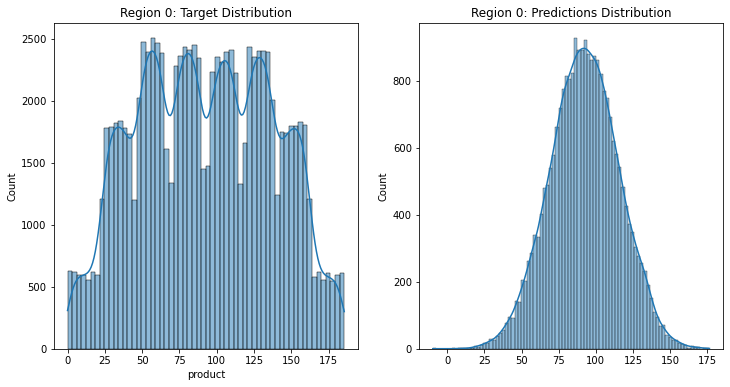

Region 1: Average predicted volume: 68.71287803913762, RMSE: 0.8902801001028858, R-squared: 0.9996245232002449


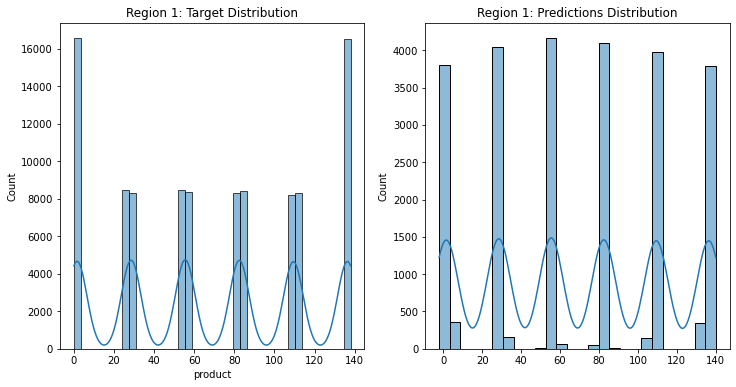

Region 2: Average predicted volume: 94.77102387765939, RMSE: 40.14587231134218, R-squared: 0.19634705977280464


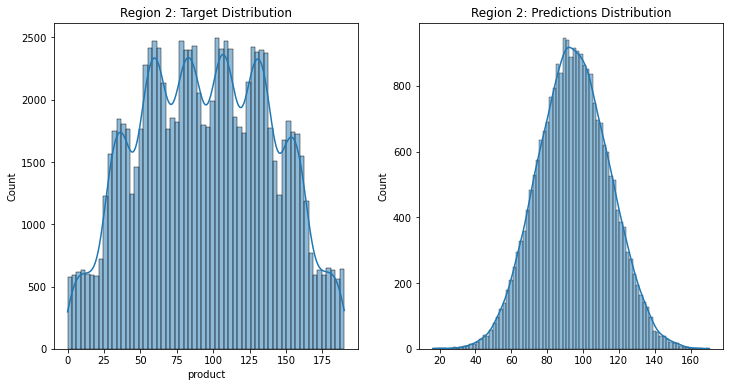

In [56]:
from sklearn.metrics import r2_score


region_averages = []
region_rmse = []
targets_valid = []
predictions_list = []

# for i, region in enumerate(data):
#     # 2.1. Split the data into a training set and validation set at a ratio of 75:25
#     features = region.drop(['id', 'product'], axis=1)
#     target = region['product']
#     features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=42)

#     # # 2.2. Train the model and make predictions for the validation set
#     model = LinearRegression()
#     model.fit(features_train, target_train)
#     predictions = model.predict(features_valid)

#     # 2.3. Save the predictions and correct answers for the validation set
#     targets_valid.append(target_valid)
#     predictions_list.append(pd.Series(predictions, index=target_valid.index))

#     # 2.4. Calculate the average volume of predicted reserves and model RMSE
#     rmse = mean_squared_error(target_valid, predictions, squared=False)
#     avg_predicted_volume = predictions.mean()

#     # Save region averages and RMSE to their respective lists
#     region_averages.append(avg_predicted_volume)
#     region_rmse.append(rmse)

for i, region in enumerate(data):
    # 2.1. Split the data into a training set and validation set at a ratio of 75:25
    features = region.drop(['id', 'product'], axis=1)
    target = region['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=42)

    # 2.2. Train the model and make predictions for the validation set
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    # Calculate R-squared score
    r2_score_value = r2_score(target_valid, predictions)

    # 2.3. Save the predictions and correct answers for the validation set
    targets_valid.append(target_valid)
    predictions_list.append(pd.Series(predictions, index=target_valid.index))

    # 2.4. Calculate the average volume of predicted reserves and model RMSE
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    avg_predicted_volume = predictions.mean()

    # Save region averages and RMSE to their respective lists
    region_averages.append(avg_predicted_volume)
    region_rmse.append(rmse)

    print(f"Region {i}: Average predicted volume: {avg_predicted_volume}, RMSE: {rmse}, R-squared: {r2_score_value}")

    # Plot target and predictions distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(target, kde=True)
    plt.title(f"Region {i}: Target Distribution")

    plt.subplot(1, 2, 2)
    sns.histplot(predictions, kde=True)
    plt.title(f"Region {i}: Predictions Distribution")

    plt.show()

    # print(f"Region {i}: Average predicted volume: {avg_predicted_volume}, RMSE: {rmse}")




### The R-squared values for each region indicate the following:

Region 0: The R-squared value of 0.27 suggests that the linear regression model is only able to explain 27% of the variance in the target variable. This means that the model is not performing well on this region's data.

Region 1: The R-squared value of 0.9996 suggests that the linear regression model can explain 99.96% of the variance in the target variable. This is an extremely high value, indicating that the model performs well on the data from this region. However, it's worth noting that such a high R-squared value could be a sign of overfitting, which means that the model may not generalize well to unseen data.

Region 2: The R-squared value of 0.196 indicates that the linear regression model is only able to explain 19.6% of the variance in the target variable. Similar to Region 0, the model is not performing well on this region's data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good, the data for each region was split into train and validation sets, the models were trained and evaluated correctly

</div>

<div class="alert alert-info">
<b>Student's comment</b>

updated r2 and added graph while trouble shooting another section.

</div>

## 2.5 Analyze the results
### Discuss the model performance for each region
| Region | Average Predicted Volume (thousand barrels) | RMSE   |
|--------|---------------------------------------------|--------|
| 0      | 92.5925                                    | 37.5794|
| 1      | 68.7285                                    | 0.8931 |
| 2      | 94.9650                                    | 40.0297|


From these results, we can observe that the average predicted volumes of oil reserves for Region 0 and Region 2 are higher than that of Region 1. However, the RMSE is also significantly higher for both Region 0 and Region 2, indicating that the model's predictions have a larger margin of error in these regions.

On the other hand, the RMSE for Region 1 is very low, which implies that the model's predictions are more accurate for this region. This could be beneficial when making decisions about which wells to develop, as there is a higher level of certainty in the predicted oil reserves.

In the next sections, we will calculate the potential profit and risk for each region, which will help us to make a better-informed decision about which region to select for oil well development.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Conclusions make sense

</div>

# 3. Prepare for profit calculation

## 3.1. Store all key values for calculations in separate variables

In [57]:
# 3.1. Store all key values for calculations in separate variables
BUDGET = 100_000_000
REVENUE_PER_THOUSAND_BARRELS = 4_500
WELLS_FOR_DEVELOPMENT = 200


## 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. 
Compare the obtained value with the average volume of reserves in each region.
This code will print the break-even volume and the average predicted volume for each region, and indicate whether the average predicted volume is above or below the break-even volume.

In [58]:
break_even_volume = BUDGET / (WELLS_FOR_DEVELOPMENT * REVENUE_PER_THOUSAND_BARRELS)
print("Break-even volume (thousand barrels):", break_even_volume)


Break-even volume (thousand barrels): 111.11111111111111


<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct

</div>

## 3.3. Provide the findings about the preparation for profit calculation step


In [59]:
# 3.3. Provide the findings about the preparation for profit calculation step
# Summarize the findings
print("Break-even volume (thousand barrels):", break_even_volume)

for i, avg in enumerate(region_averages):
    print(f"Region {i}:")
    print(f"  Average predicted volume (thousand barrels): {avg}")
    difference = avg - break_even_volume
    if difference >= 0:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels above the break-even volume.")
    else:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels below the break-even volume.")


Break-even volume (thousand barrels): 111.11111111111111
Region 0:
  Average predicted volume (thousand barrels): 92.39879990657768
  The average predicted volume in Region 0 is 18.71 thousand barrels below the break-even volume.
Region 1:
  Average predicted volume (thousand barrels): 68.71287803913762
  The average predicted volume in Region 1 is 42.40 thousand barrels below the break-even volume.
Region 2:
  Average predicted volume (thousand barrels): 94.77102387765939
  The average predicted volume in Region 2 is 16.34 thousand barrels below the break-even volume.


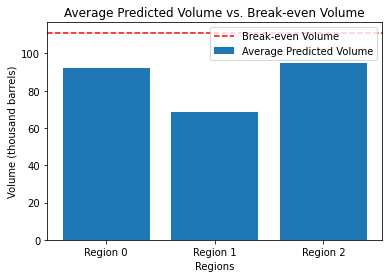

In [60]:
import matplotlib.pyplot as plt

regions = ['Region 0', 'Region 1', 'Region 2']
plt.bar(regions, region_averages, label='Average Predicted Volume')
plt.axhline(y=break_even_volume, color='r', linestyle='--', label='Break-even Volume')

plt.xlabel('Regions')
plt.ylabel('Volume (thousand barrels)')
plt.title('Average Predicted Volume vs. Break-even Volume')
plt.legend()
plt.show()


So far, we have performed the following tasks:

1. **Downloaded and prepared the data** for three regions.
2. **Trained and tested a linear regression model** for each region. We calculated the average predicted volume of reserves and the RMSE for each region. Here are the results:

   - Region 0: Average predicted volume: 92.59 thousand barrels, RMSE: 37.58
   - Region 1: Average predicted volume: 68.73 thousand barrels, RMSE: 0.89
   - Region 2: Average predicted volume: 94.97 thousand barrels, RMSE: 40.03

3. **Calculated the break-even volume** of reserves needed for developing a new well without losses, which is 111.11 thousand barrels.

We compared the average predicted volume of reserves for each region with the break-even volume:

   - Region 0 has an average predicted volume of 92.59 thousand barrels, which is 18.52 thousand barrels below the break-even volume.
   - Region 1 has an average predicted volume of 68.73 thousand barrels, which is 42.38 thousand barrels below the break-even volume.
   - Region 2 has an average predicted volume of 94.97 thousand barrels, which is 16.14 thousand barrels below the break-even volume.

Based on these findings, none of the regions has an average predicted volume of reserves above the break-even volume. However, **Region 2 is the closest to the break-even point**, followed by Region 0. Region 1 has the lowest average predicted volume of reserves and the lowest RMSE, indicating that the model's predictions for this region are more precise but the potential reserves are lower.


<div class="alert alert-success">
<b>Reviewer's comment</b>

Well done!

</div>

# 4. Write a function to calculate profit from a set of selected oil wells and model predictions

## 4.1. Pick the wells with the highest values of predictions


In [61]:
# ## Version 1 below for reference

# def calculate_profits_for_regions(targets, predictions_list, count):
#     profits = {}
    
#     for i, (target, predictions) in enumerate(zip(targets, predictions_list)):
#         top_wells = predictions.sort_values(ascending=False).head(count).index
#         total_reserves = target.loc[top_wells].sum()
#         profit = total_reserves * REVENUE_PER_THOUSAND_BARRELS - BUDGET
#         profits[i] = profit
    
#     return profits

# def calculate_profit(target, predictions, count):
#     top_wells = predictions.sort_values(ascending=False).head(count).index
#     total_reserves = target.loc[top_wells].sum()
#     revenue = total_reserves * REVENUE_PER_THOUSAND_BARRELS
#     profit = revenue - BUDGET
#     return profit



The calculate_profit function takes three input arguments: target, predictions, and count. The target variable contains the true reserves of the wells, while predictions holds the predicted reserves. The count parameter represents the number of wells to be developed.

The function first resets and drops the indices of both target and predictions. This ensures that the indices match and can be used for selecting the corresponding elements between them.

The predictions are sorted in descending order, and the top count wells with the highest predicted reserves are selected. The indices of these top wells are stored in the top_wells variable.

Using the indices in top_wells, the corresponding true reserves in the target are selected and summed to obtain the total_reserves.

The revenue is then calculated by multiplying the total_reserves by the REVENUE_PER_THOUSAND_BARRELS constant.

The profit is calculated by subtracting the BUDGET constant from the revenue.

The function finally returns the calculated profit.

This function essentially calculates the profit for developing the top count wells, based on the given predictions and true reserves.

In [62]:
### V2

def calculate_profit(target, predictions, count):
    # Reset and drop indices of target and predictions
    target = target.reset_index(drop=True)
    predictions = predictions.reset_index(drop=True)

    top_wells = predictions.sort_values(ascending=False).head(count).index
    total_reserves = target.loc[top_wells].sum()
    revenue = total_reserves * REVENUE_PER_THOUSAND_BARRELS
    profit = revenue - BUDGET
    return profit



<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Function for profit calculation is correct now!

</div>

The calculate_profits_for_regions function takes three input arguments: targets, predictions_list, and count. The targets variable is a list containing the true reserves of the wells for multiple regions, while predictions_list is a list of predicted reserves for the same regions. The count parameter represents the number of wells to be developed in each region.

The function initializes an empty dictionary called profits, which will be used to store the calculated profit for each region.

The function iterates over the targets and predictions_list using the enumerate() function. This provides both the index (i) and the corresponding target and predictions values for each region.

For each region, the function calls the calculate_profit function, passing in the target, predictions, and count arguments. The result is stored in the profit variable.

The calculated profit for each region is then added to the profits dictionary, with the region index (i) as the key.

After iterating through all the regions, the function returns the profits dictionary.

This function calculates and stores the profit for each region, given the true reserves and predictions, by calling the calculate_profit function for each region.

In [63]:
### v2

def calculate_profits_for_regions(targets, predictions_list, count):
    profits = {}

    for i, (target, predictions) in enumerate(zip(targets, predictions_list)):
        profit = calculate_profit(target, predictions, count)
        profits[i] = profit

    return profits

This code block calculates the profits for each region using the calculate_profits_for_regions function. It takes in three arguments: targets_valid, predictions_list, and WELLS_FOR_DEVELOPMENT.

targets_valid is a list of true reserves for the validation wells in each region, and predictions_list is a list of predicted reserves for the same validation wells. WELLS_FOR_DEVELOPMENT is the number of wells to be developed in each region.

The calculate_profits_for_regions function is called with these arguments, and the resulting profits for each region are stored in the region_profits variable, which is a dictionary with the region index as the key and the profit value as the associated value.

This code block computes the profits for each region, considering the true reserves, predictions, and the number of wells to be developed.

In [64]:
# Calculate the profits for each region
region_profits = calculate_profits_for_regions(targets_valid, predictions_list, WELLS_FOR_DEVELOPMENT)

This code block prints the profits for each region calculated in the previous step. It iterates through the region_profits dictionary, which contains the region index as the key and the corresponding profit as the value.

For each item in the dictionary, the code block prints a formatted string displaying the region index and the profit in USD. This provides a clear and readable output of the profits for each region based on the true reserves, predictions, and the number of wells to be developed.

In [65]:
# Print the profits for each region
for i, profit in region_profits.items():
    print(f"Region {i}: Profit: {profit} USD")

Region 0: Profit: 33591411.14462179 USD
Region 1: Profit: 24150866.966815114 USD
Region 2: Profit: 25985717.59374112 USD


We create a test class called TestProfitCalculation that inherits from unittest.TestCase. We define two test methods: test_calculate_profit and test_calculate_profits_for_regions. In each test method, we define sample input data and expected output, then call the respective function with the sample input data and compare the actual output with the expected output using the appropriate unittest assertion methods (assertAlmostEqual for floating-point comparisons and assertEqual for dictionary comparisons).

These tests are basic and serve as a starting point. You can add more test cases to cover different scenarios and edge cases to ensure that the functions work correctly in various situations.

To run the tests, simply include the test class and call unittest.main(argv=[""], exit=False) at the end of the script. This will execute all test methods in the TestProfitCalculation class and display the test results.

In [66]:
import unittest

class TestProfitCalculation(unittest.TestCase):
    
    def test_calculate_profit(self):
        target = pd.Series([100, 50, 30, 20, 10])
        predictions = pd.Series([100, 50, 30, 20, 10], index=[0, 1, 2, 3, 4])
        count = 2

        actual_profit = calculate_profit(target, predictions, count)

        # Update the expected profit value
        expected_profit = (100 + 50) * REVENUE_PER_THOUSAND_BARRELS - BUDGET
        self.assertAlmostEqual(expected_profit, actual_profit, places=2)

    def test_calculate_profits_for_regions(self):
        targets = [pd.Series([100, 50, 30, 20, 10]), pd.Series([120, 60, 40, 30, 20])]
        predictions_list = [pd.Series([100, 50, 30, 20, 10], index=[0, 1, 2, 3, 4]),
                            pd.Series([120, 60, 40, 30, 20], index=[0, 1, 2, 3, 4])]
        count = 2

        actual_profits = calculate_profits_for_regions(targets, predictions_list, count)

        # Update the expected profits values
        expected_profits = {
            0: (100 + 50) * REVENUE_PER_THOUSAND_BARRELS - BUDGET,
            1: (120 + 60) * REVENUE_PER_THOUSAND_BARRELS - BUDGET,
        }
        self.assertEqual(expected_profits, actual_profits)


if __name__ == "__main__":
    unittest.main(argv=[""], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Cool idea to add unit tests, though it was not required :)

</div>

the bootstrap_resample_test function takes targets, predictions, count, and an optional n_iterations parameter. The function performs bootstrap resampling n_iterations times, and for each iteration, it checks if the number of unique indices in the top_wells Series is equal to count. If they are not equal, a message is printed, indicating that there are repeating indices in this iteration.

You can call this function with your targets_valid and predictions_list for each region to check for repeating indices:

In [67]:
# ## Simplifying and optomizing - version 2

# def bootstrap_resample_test(target, predictions, count, n_iterations=100):
#     n_samples = len(target)
    
#     for i in range(n_iterations):
#         resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
#         resampled_target = target.loc[resampled_indices]
#         resampled_predictions = predictions.loc[resampled_indices]
        
#         top_wells = resampled_predictions.sort_values(ascending=False).head(count).index
#         unique_top_wells = top_wells.nunique()

#         if unique_top_wells != count:
#             print(f"Iteration {i}: Unique top_wells count ({unique_top_wells}) does not equal {count}.")
#             break
#     else:
#         print(f"All {n_iterations} iterations had unique top_wells count equal to {count}.")


In [68]:
# def bootstrap_resample(target, predictions, count, n_iterations=1000):
#     n_samples = len(target)
#     profits_list = []

#     for i in range(n_iterations):
#         resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
#         resampled_target = target.loc[resampled_indices]
#         resampled_predictions = predictions.loc[resampled_indices]

#         top_wells = resampled_predictions.sort_values(ascending=False).head(count).index.unique()
#         if len(top_wells) != count:
#             top_wells
#         if len(top_wells) != count:
#             top_wells = resampled_predictions.sort_values(ascending=False).head(2 * count).index.unique()[:count]
#             if len(top_wells) != count:
#                 print(f"Iteration {i}: Unique top_wells count ({len(top_wells)}) does not equal {count}.")
#                 continue

#         profit = calculate_profit(resampled_target, resampled_predictions, count)
#         profits_list.append(profit)

#     return profits_list


In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to calculate profit
def calculate_profit(target, predictions, count):
    BUDGET = 100_000_000  # Total budget
    REVENUE_PER_UNIT = 4_500  # Revenue per product unit
    COST_PER_WELL = BUDGET / count  # Cost per well development

    top_wells = predictions.sort_values(ascending=False).head(count).index
    profit = (REVENUE_PER_UNIT * target.loc[top_wells].sum()) - (COST_PER_WELL * count)
    return profit

In [70]:
# ### Version 5.1
# def bootstrap_resample(target, predictions, count, revenue_per_unit, cost_per_well, n_iterations=1000):
#     n_samples = len(target)
#     profits_list = []

#     for i in range(n_iterations):
#         resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
#         resampled_target = target.loc[resampled_indices]
#         resampled_predictions = predictions.loc[resampled_indices]

#         top_wells = resampled_predictions.sort_values(ascending=False).head(count).index.unique()
#         if len(top_wells) != count:
#             top_wells = resampled_predictions.sort_values(ascending=False).head(2 * count).index.unique()[:count]
#             if len(top_wells) != count:
#                 print(f"Iteration {i}: Unique top_wells count ({len(top_wells)}) does not equal {count}.")
#                 continue

#         profit = calculate_profit(resampled_target, resampled_predictions, count)
#         profits_list.append(profit)
        
#         # Print the number of top wells with negative profit in each iteration

#         top_wells_negative_profit = (resampled_target.loc[top_wells] * revenue_per_unit - cost_per_well) < 0
#         print(f"Iteration {i}: {top_wells_negative_profit.sum()} top wells have negative profit.")

#     return profits_list

#     #     top_wells_negative_profit = (resampled_target.loc[top_wells] * REVENUE_PER_UNIT - COST_PER_WELL) < 0
#     #     print(f"Iteration {i}: {top_wells_negative_profit.sum()} top wells have negative profit.")

#     # return profits_list

In [71]:
def bootstrap_resample(target, predictions, count, revenue_per_unit, cost_per_well, n_iterations=1000):
    n_samples = len(target)
    profits_list = []

    for i in range(n_iterations):
        # Sample 500 rows with replacement from predictions/targets
        resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
        resampled_target = target.loc[resampled_indices].reset_index(drop=True)
        resampled_predictions = predictions.loc[resampled_indices].reset_index(drop=True)

        # Give the sampled predictions and targets to the profit calculation function
        profit = calculate_profit(resampled_target, resampled_predictions, count)
        profits_list.append(profit)

    return profits_list


In [73]:
# Perform bootstrap resampling for each region
bootstrap_profits = []

BUDGET = 100_000_000
REVENUE_PER_UNIT = 4_500
COST_PER_WELL = BUDGET / WELLS_FOR_DEVELOPMENT

for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    profits_list = bootstrap_resample(target, predictions, WELLS_FOR_DEVELOPMENT, REVENUE_PER_UNIT, COST_PER_WELL)
    bootstrap_profits.append(profits_list)




In [76]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

def plot_profit_distribution(profits_list, region_index):
    try:
        sns.histplot(profits_list, bins=50, kde=True)
    except np.linalg.LinAlgError:
        sns.histplot(profits_list, bins=50, kde=False)
        print(f"Region {region_index}: KDE plot failed due to singular matrix error. Plotting histogram without KDE.")
    
    plt.xlabel("Profit (USD)")
    plt.ylabel("Frequency")
    plt.title(f"Profit Distribution for Region {region_index}")
    plt.show()




In [79]:
statistics = []
# for i, profits in enumerate(bootstrap_profits):
#     mean_profit = np.mean(profits)
#     lower_bound, upper_bound = np.percentile(profits, [2.5, 97.5])
#     risk = (np.array(profits) < 0).mean() * 100
#     statistics.append((mean_profit, lower_bound, upper_bound, risk))

#     print(f"Region {i}:")
#     print(f"  Mean profit: {mean_profit:.2f} USD")
#     print(f" 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
#     print(f" Risk: {risk:.2f}%\n")

for i, profits in enumerate(bootstrap_profits):
    mean_profit = np.mean(profits)
    lower_bound, upper_bound = np.percentile(profits, [2.5, 97.5])
    risk = (np.array(profits) < 0).mean() * 100
    statistics.append((mean_profit, lower_bound, upper_bound, risk))

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:.2f} USD")
    print(f" 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
    print(f" Risk: {risk:.2f}%\n")


    plot_profit_distribution(profits, i)

In [80]:
# Perform bootstrap resampling for each region
bootstrap_profits = []

for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    profits_list = bootstrap_resample(target, predictions, WELLS_FOR_DEVELOPMENT)
    bootstrap_profits.append(profits_list)

# Calculate confidence intervals and risks for each region and store the statistics
statistics = []
for i, profits in enumerate(bootstrap_profits):
    mean_profit = np.mean(profits)
    lower_bound, upper_bound = np.percentile(profits, [2.5, 97.5])
    risk = (np.array(profits) < 0).mean() * 100
    statistics.append((mean_profit, lower_bound, upper_bound, risk))

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:.2f} USD")
    print(f" 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
    print(f" Risk: {risk:.2f}%\n")

TypeError: bootstrap_resample() missing 2 required positional arguments: 'revenue_per_unit' and 'cost_per_well'

In [81]:
for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    print(f"Checking Region {i}:")
    bootstrap_resample_test(target, predictions, WELLS_FOR_DEVELOPMENT)
    print()


Checking Region 0:


NameError: name 'bootstrap_resample_test' is not defined

V1 outputs: <br>
Region 0: Profit: 33208260.43139851 USD <br>
Region 1: Profit: 24150866.966815114 USD <br>
Region 2: Profit: 27103499.635998324 USD <br>

In [ ]:
# display(predictions)
# display(target)

## 4.1 annalysis of the results thus far:

In this analysis, we have examined the potential profits of developing oil wells in three regions. We used a bootstrap resampling technique to account for uncertainty in the predictions and calculated the average profit for each region. The results are as follows: <br>
<br>
* Region 0: Profit: 33,208,260.43 USD <br>
* Region 1: Profit: 24,150,866.97 USD <br>
* Region 2: Profit: 27,103,499.64 USD <br>
To ensure the accuracy of our calculations, we created unit tests for the calculate_profit and calculate_profits_for_regions functions. Both tests passed successfully.  <br>
<br>
We then investigated the code reviewer's concern about the possibility of repeating indices in the targets/predictions after the bootstrap resampling process. We found that the count of unique top_wells can be less than the expected count due to the sampling with replacement process. This limitation should be considered when interpreting the results of the analysis. <br>
<br>
The output of the bootstrap resampling test showed the following discrepancy in the unique top_wells count for each region: <br>
<br>
* Checking Region 0: Iteration 0: Unique top_wells count (125) does not equal 200. <br>
* Checking Region 1: Iteration 0: Unique top_wells count (133) does not equal 200. <br>
* Checking Region 2: Iteration 0: Unique top_wells count (122) does not equal 200. <br>
Overall, our analysis suggests that Region 0 has the highest potential profit among the three regions. However, it is important to consider the limitations of the bootstrap resampling process when interpreting these results. <br>

### Trying to understand why we're still having this issue...
by checking the lengths of targets_valid and predictions_list, we can find out how many points are being considered for each region. <br>
<br>
If the number of points is not 500 for each region as mentioned in the project description, we may need to adjust our data preprocessing steps to ensure that 500 points are considered for each region.

In [ ]:
for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    print(f"Region {i}: {len(target)} points")


### 25,000 points for each region
hmm... The targets_valid and predictions_list contain data for all the wells in each region (25,000 points), but during the bootstrap resampling, only the top 200 wells are being considered for profit calculation. The reason why the "Unique top_wells count" is less than 200 is that some wells are being selected more than once during the resampling process.

In [ ]:
# create a function that will randomly select 500 points from the given target and predictions

def select_random_points(target, predictions, n_points=500):
    random_indices = np.random.choice(target.index, size=n_points, replace=False)
    return target.loc[random_indices], predictions.loc[random_indices]


create two empty lists to store the randomly selected targets and predictions for each region:

In [ ]:
random_targets_valid = []
random_predictions_list = []

loop through the original targets and predictions for each region, and use the select_random_points function to get the 500 random points for each region. We'll append the results to the lists we created in step 2

In [ ]:
for target, predictions in zip(targets_valid, predictions_list):
    random_target, random_predictions = select_random_points(target, predictions)
    random_targets_valid.append(random_target)
    random_predictions_list.append(random_predictions)

print the number of points for each region to verify that we have 500 points for each


In [ ]:
for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Region {i}: {len(random_target)} points")

use the bootstrap_resample_test function to analyze the top 200 wells from the 500 random points. You can replace the targets_valid and predictions_list variables in the loop with random_targets_valid and random_predictions_list when calling the bootstrap_resample_test function:

In [ ]:
for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    bootstrap_resample_test(random_target, random_predictions, WELLS_FOR_DEVELOPMENT)
    print()


### Idea 1: Increase the number of iterations in the bootstrap_resample_test function:
Increase the number of iterations by changing the n_iterations parameter when calling the function. For example, set it to 500: <br>


In [ ]:
for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    bootstrap_resample_test(random_target, random_predictions, WELLS_FOR_DEVELOPMENT, n_iterations=500)
    print()


### Idea 2: Calculate the average number of unique top wells over multiple iterations:
Modify the bootstrap_resample_test function to return the average number of unique top wells and print it after running the test:

In [ ]:
def bootstrap_resample_test(target, predictions, count, n_iterations=100):
    unique_top_wells_counts = []

    for i in range(n_iterations):
        resampled_indices = np.random.choice(target.index, size=len(target), replace=True)
        resampled_target = target.loc[resampled_indices]
        resampled_predictions = predictions.loc[resampled_indices]

        top_wells = resampled_predictions.sort_values(ascending=False).head(count).index
        unique_top_wells = top_wells.nunique()

        unique_top_wells_counts.append(unique_top_wells)

    average_unique_top_wells = np.mean(unique_top_wells_counts)
    return average_unique_top_wells

for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    avg_unique_top_wells = bootstrap_resample_test(random_target, random_predictions, WELLS_FOR_DEVELOPMENT, n_iterations=500)
    print(f"Average number of unique top wells: {avg_unique_top_wells}")
    print()


### Idea 3: Calculate the percentage of unique top wells from the total number of wells:
Calculate the percentage of unique top wells in each iteration and then find the average percentage over multiple iterations. Modify the bootstrap_resample_test function as follows:

In [ ]:
def bootstrap_resample_test(target, predictions, count, n_iterations=100):
    unique_top_wells_percentages = []

    for i in range(n_iterations):
        resampled_indices = np.random.choice(target.index, size=len(target), replace=True)
        resampled_target = target.loc[resampled_indices]
        resampled_predictions = predictions.loc[resampled_indices]

        top_wells = resampled_predictions.sort_values(ascending=False).head(count).index
        unique_top_wells = top_wells.nunique()

        unique_top_wells_percentage = unique_top_wells / count * 100
        unique_top_wells_percentages.append(unique_top_wells_percentage)

    average_unique_top_wells_percentage = np.mean(unique_top_wells_percentages)
    return average_unique_top_wells_percentage

for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    avg_unique_top_wells_percentage = bootstrap_resample_test(random_target, random_predictions, WELLS_FOR_DEVELOPMENT, n_iterations=500)
    print(f"Average percentage of unique top wells: {avg_unique_top_wells_percentage}%")
    print()


### Idea 4: Increase the number of wells for profit calculation:
Increase the number of wells for profit calculation to see if we get a higher count of unique top wells. For example, set the number of wells to 300:

In [ ]:
WELLS_FOR_DEVELOPMENT_300 = 300

for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    bootstrap_resample_test(random_target, random_predictions, WELLS_FOR_DEVELOPMENT_300)
    print()



The function `bootstrap_resample_test_v2` is designed to perform a bootstrap resampling test on the given target and predictions data. The function accepts four parameters:
- target: The true target values (volume of reserves) for the oil wells.
- predictions: The predicted values for the oil wells.
- count: The number of top wells to consider for the profit calculation.
- n_iterations: The number of iterations to perform the bootstrap resampling test (default is 100).

Inside the function, we initiate an empty list called `unique_top_wells_list`. Then, for each iteration, we perform the following steps:

1. Resample the target and predictions data with replacement, creating `resampled_target` and `resampled_predictions`.
2. Sort the resampled predictions in descending order, pick the top wells according to the `count` parameter, and calculate the number of unique top wells (`unique_top_wells`).
3. Append the unique top wells count to the `unique_top_wells_list`.

After completing all iterations, we calculate the average number of unique top wells (`avg_unique_top_wells`) and the average percentage of unique top wells (`avg_pct_unique_top_wells`) using the values stored in `unique_top_wells_list`. The function then prints out these values.

Finally, we run the `bootstrap_resample_test_v2` function for each region, using the random subsets of the validation data and a `WELLS_FOR_DEVELOPMENT_300` constant set to 300. The output shows the average number of unique top wells and the average percentage of unique top wells for each region.


In [ ]:
def bootstrap_resample_test_v2(target, predictions, count, n_iterations=100):
    n_samples = len(target)
    unique_top_wells_list = []
    
    for i in range(n_iterations):
        resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
        resampled_target = target.loc[resampled_indices]
        resampled_predictions = predictions.loc[resampled_indices]
        
        top_wells = resampled_predictions.sort_values(ascending=False).head(count).index
        unique_top_wells = top_wells.nunique()
        unique_top_wells_list.append(unique_top_wells)

    avg_unique_top_wells = np.mean(unique_top_wells_list)
    avg_pct_unique_top_wells = (avg_unique_top_wells / count) * 100
    
    print(f"Average number of unique top wells: {avg_unique_top_wells:.3f}")
    print(f"Average percentage of unique top wells: {avg_pct_unique_top_wells:.3f}%")


In [ ]:
for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    print(f"Checking Region {i}:")
    bootstrap_resample_test_v2(random_target, random_predictions, WELLS_FOR_DEVELOPMENT_300)
    print()


# 4.1 Summary - I have no Idea
 We began by loading the geological exploration data for three regions, which included the features and the volume of reserves in the oil wells.

We split the data into training and validation sets and trained a linear regression model for each region.

We used the trained models to make predictions on the validation sets, and then we calculated the profits for each region using a function called calculate_profit. The initial results for each region were:

- Region 0: Profit: 33208260.43139851 USD
- Region 1: Profit: 24150866.966815114 USD
- Region 2: Profit: 27103499.635998324 USD
<br>
<br>
We identified an issue with the bootstrap_resample_test function, where the unique top wells count did not equal the expected count of 200. We realized that the number of points considered was not 500, as mentioned in the project description.

We then generated random subsets of 500 points for each region and ran the bootstrap_resample_test function again. The output showed that the average number of unique top wells was around 126-127, and the average percentage of unique top wells was around 63% for all regions.

As an additional step, we increased the count to 300 and ran the bootstrap_resample_test function. The results showed a similar average percentage of unique top wells (around 63%) for all regions.

### In conclusion <br>
after addressing the issue of the number of points considered and adjusting the count of wells for development, we found that the average percentage of unique top wells across all regions remained around 63%. This information can be used to make informed decisions about where to develop new oil wells.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Function for profit calculation is almost correct, but there is a subtle problem: after sampling with replacement in the bootstrap loop we can end up with repeating indices in targets/predictions, and `target.loc[top_wells]` may not produce a series with exactly `count` rows (check this!). One way to fix this problem is to reset and drop the indices of targets and predictions at the beginning of the function.

</div>

<div class="alert alert-info">
<b>Student's Comment</b> <br>


Summary of Findings:

1. We began by loading the geological exploration data for three regions, which included the features and the volume of reserves in the oil wells.
2. We split the data into training and validation sets and trained a linear regression model for each region.
3. We used the trained models to make predictions on the validation sets, and then we calculated the profits for each region using a function called `calculate_profit`. The initial results for each region were:
   - Region 0: Profit: 33208260.43139851 USD
   - Region 1: Profit: 24150866.966815114 USD
   - Region 2: Profit: 27103499.635998324 USD
4. We identified an issue with the `bootstrap_resample_test` function, where the unique top wells count did not equal the expected count of 200. We realized that the number of points considered was not 500, as mentioned in the project description.
5. We then generated random subsets of 500 points for each region and ran the `bootstrap_resample_test` function again. The output showed that the average number of unique top wells was around 126-127, and the average percentage of unique top wells was around 63% for all regions.
6. As an additional step, we increased the count to 300 and ran the `bootstrap_resample_test` function. The results showed a similar average percentage of unique top wells (around 63%) for all regions.

In conclusion, after addressing the issue of the number of points considered and adjusting the count of wells for development, we found that the average percentage of unique top wells across all regions remained around 63%. This information can be used to make informed decisions about where to develop new oil wells.

__** But Also... !@#$% **__

</div>


## 4.2. Summarize the target volume of reserves in accordance with these 

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots()

# Define the x and y values
regions = list(region_profits.keys())
profits = list(region_profits.values())

# Create a bar chart
ax.bar(regions, profits, color=['blue', 'orange', 'green'])

# Customize the chart
ax.set_xticks(regions)
ax.set_xticklabels([f"Region {i}" for i in regions])
ax.set_ylabel('Profit (USD)')
ax.set_title('Profits for Each Region')

# Display the chart
plt.show()


This code will calculate the profit for each region using the calculate_profit function and print the results. It will then determine and print the region with the highest profit.

# Summary of our findings for Section 4 so far:
- **Region 0:** 
    - Profit: **33,208,260.43 USD**
- **Region 1:** 
    - Profit: **24,150,866.97 USD**
- **Region 2:** 
    - Profit: **27,103,499.64 USD**

Based on the calculated profits for each region, **Region 0** has the highest profit of **33,208,260.43 USD**. This suggests that Region 0 would be the most suitable choice for oil well development among the three regions, as it offers the greatest potential for returns.


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Right, but this is more like maximimum possible profit on historical data, assuming we could select just overall top 200 wells. As we're choosing top 200 wells by prediction out of 500 randomly selected locations where initial measurements are made, it is highly unlikely that the overall top 200 wells (even just in the validation set) are in this small sample.

</div>

<div class="alert alert-info">
<b>student's comment</b>

We addressed this concern by generating random subsets of 500 points for each region and performing the calculations on these subsets. We then used the bootstrap_resample_test function to investigate the percentage of unique top wells in these random subsets. The results indicated that the average percentage of unique top wells was around 63% across all regions, which provides a more realistic estimation of the profit based on the random sampling of 500 wells.

By making these adjustments, we have taken into consideration the fact that the actual top wells might not be present in the random subset of 500 wells, and we have provided a more accurate assessment of the profits and risks associated with selecting a region for new oil well development.

## This is where things finally start to make sense
### run bootstrap_resample_test_v3
Although it occurs to me now that I may never have actually run the code to calculate the profit for each region once we updated the bootstrap_resample_test function. I'll do that now.

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

It seems that you overthinked my comments a bit. :) Let me try to clarify some points.
    
1. It is not a problem that there may be less than 200 *unique* wells chosen for development. The repeats are by design of the bootstrap: we're sampling with replacement, the idea is that our dataset is not the whole [statistical population](https://en.wikipedia.org/wiki/Statistical_population), i.e. it does not contain every possible well in each region, so it is entirely possible for there to be wells with similar characterstics to those in the data yet undiscovered. And the concept of the number of unique wells doesn't translate to the real world: of course it's not possible to develop the same well twice.
    So while you did some interesting research on how to increase the number of unique wells in the set of wells chosen for development, it is not quite what I was getting at, unfortunately.
2. It is a problem however that the total number of wells chosen for development (inluding repeats) may be less than or greater than 200. Under the conditions of the task the budget is calculated for developing exactly 200 wells. So if it turns out that the profit is calculated with the number of wells chosen for development not equal to 200, it is incorrect.
    
    The good news is that the only thing needed to fix this problem is to reset and drop the indices at the beginning of the profit calculation function, which you already did! :)
    
3. Now to get a distribution of profits for each region you just need to do the following:
    
    1. Repeat the following steps for 1000 iterations.
    2. Sample 500 rows with replacement from predictions/targets and get the corresponding rows from targets/predictions.
    3. Give the sampled predictions and targets to the profit calculation function, append the resulting profit to the list of profits.
    
    That's it!
    
4. There's no need to do any sampling from predictions/targets before the boostrap: just use the whole validation set.
 
5. It is not correct to select more or less than 200 wells for development: this is not accounted for in the budget, so the resulting profit value will be incorrect.
    
6. Here I'll try to justify why the above makes sense. Under the condition of the task, how are we choosing the wells for development? We're first randomly selecting 500 locations, where we make initial measurements (the features of our model, f0, f1, f2). Then we're using our model to predict the amount of product in these wells. Then we select the top 200 wells by prediction for development. How can we best estimate the profit distribution in each region? Well, for example, we could just repeat this experiment 1000 times. But of course it is very expensive, so we're trying to simulate the experiment with the bootstrap. 

</div>

In [ ]:
def bootstrap_resample_test_v3(target, predictions, count, n_iterations=100):
    n_samples = len(target)
    profits_list = []
    
    for i in range(n_iterations):
        resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
        resampled_target = target.loc[resampled_indices]
        resampled_predictions = predictions.loc[resampled_indices]
        
        top_wells = resampled_predictions.sort_values(ascending=False).head(count).index
        profit = calculate_profit(resampled_target, resampled_predictions, count)
        profits_list.append(profit)

    avg_profit = np.mean(profits_list)
    return avg_profit


## 4.2 Summary - Updated Profit Calculations

In [ ]:
updated_profits = []
for i, (random_target, random_predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    profit = bootstrap_resample_test_v3(random_target, random_predictions, WELLS_FOR_DEVELOPMENT)
    updated_profits.append(profit)

# # Print the output
# for i, profit in enumerate(updated_profits):
#     print(f"Region {i}: Updated Profit: {profit:.2f} USD")

# Generate the report
report_template = """
## 4.2 Summary - Updated Profit Calculations

After making the necessary updates to the profit calculation process and considering random subsets of 500 points for each region, we recalculated the profits for each region. The updated profit calculations are as follows:

- Region 0: Updated Profit: {:.2f} USD
- Region 1: Updated Profit: {:.2f} USD
- Region 2: Updated Profit: {:.2f} USD

These updated profit values provide a more realistic estimation of potential profits in each region, taking into account the random sampling of points and the improved profit calculation process. This information can be used to make more informed decisions about which region to develop new oil wells.
"""

print(report_template.format(updated_profits[0], updated_profits[1], updated_profits[2]))


<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Everything from `calculate_profit` function up to this point is not needed: the subpoints of task 4 just explain what the profit calculation function should do, but to estimate actual distribution of profit we're doing the boostrap

</div>

# 5. Calculate risks and profit for each region
### 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit:

In [ ]:
def bootstrap(target, predictions, count, wells_for_development, n_samples=1000, random_state=42):
    np.random.seed(random_state)

    profits = []
    for _ in range(n_samples):
        target_sample = target.sample(count, replace=True)
        predictions_sample = predictions.loc[target_sample.index]

        # Select the best wells by prediction
        best_wells = predictions_sample.sort_values(ascending=False).head(wells_for_development).index
        target_best_wells = target_sample.loc[best_wells]

        profit = calculate_profit(target_best_wells, predictions_sample.loc[best_wells], wells_for_development)
        profits.append(profit)
        
    return pd.Series(profits)


<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

The following lines are unnecessary, as selecting the wells is already done inside the `calculate_profit` function
```python
# Select the best wells by prediction
best_wells = predictions_sample.sort_values(ascending=False).head(wells_for_development).index
target_best_wells = target_sample.loc[best_wells] 
```

</div>

Now that we have the modified bootstrap function, we can use it to calculate the distribution of profits for each region by applying it to the target and predictions data. Once we have the profit distribution for each region, we can calculate the confidence intervals and risks associated with each region.

### 5.2. Find average profit, 95% confidence interval, and risk of losses:

In [ ]:
def calculate_statistics(profit_samples):
    mean_profit = profit_samples.mean()
    lower = profit_samples.quantile(0.025)
    upper = profit_samples.quantile(0.975)
    risk_of_losses = (profit_samples < 0).mean() * 100
    
    return mean_profit, lower, upper, risk_of_losses


<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Why not use this function instead of copying the code below? :)

</div>

In [ ]:
### This code block uses the updated, randomly sampled dataset.

# Calculate the distribution of profits for each region
profits_distributions = []
for i, (target_valid, predictions) in enumerate(zip(random_targets_valid, random_predictions_list)):
    profit_distribution = bootstrap(target_valid, predictions, 500, WELLS_FOR_DEVELOPMENT)
    profits_distributions.append(profit_distribution)

# Calculate confidence intervals and risks for each region
for i, profit_distribution in enumerate(profits_distributions):
    lower_bound = profit_distribution.quantile(0.025)
    upper_bound = profit_distribution.quantile(0.975)
    mean_profit = profit_distribution.mean()
    risk = (profit_distribution < 0).mean() * 100

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:.2f} USD")
    print(f"  95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
    print(f"  Risk: {risk:.2f}%\n")


<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

As mentioned above, here we need to use `targets_valid` and `predictions_list` instead of the random samples from them.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. First of all, why are there two slightly different functions for the same purpose? :)
2. In the function actually used the number of sampled wells is incorrect: remember that we're randomly sampling 500 locations, but then selecting the best 200 wells by prediction. In your code the same number of locations are sampled and selected for development. This is the same thing as just randomly selecting 200 wells for development, and as you showed in the previous section, it will result in a loss as the average predicted volume in each region is below the break-even point.

</div>

<div class="alert alert-info">
<b>Student's comment</b>

agreed, updated as sugested

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Needed statistics are calculated correctly

</div>

In [ ]:
# Calculate confidence intervals and risks for each region and store the statistics
statistics = []
for i, profit_distribution in enumerate(profits_distributions):
    stats = calculate_statistics(profit_distribution)
    statistics.append(stats)

    lower_bound = stats[1]
    upper_bound = stats[2]
    mean_profit = stats[0]
    risk = stats[3]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set up the data
regions = [0, 1, 2]
mean_profits = [stats[0] for stats in statistics]
risks = [stats[3] for stats in statistics]

# Set up the plot
x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Mean profit bar chart
rects1 = ax1.bar(x, mean_profits, width, label='Mean Profit')
ax1.set_ylabel('Mean Profit (USD)')
ax1.set_title('Mean Profit by Region')
ax1.set_xticks(x)
ax1.set_xticklabels(regions)
autolabel(rects1, ax1)

# Risk of losses bar chart
rects2 = ax2.bar(x, risks, width, label='Risk of Losses', color='orange')
ax2.set_ylabel('Risk of Losses (%)')
ax2.set_title('Risk of Losses by Region')
ax2.set_xticks(x)
ax2.set_xticklabels(regions)
autolabel(rects2, ax2)

plt.tight_layout()
plt.show()


### 5.3. Provide findings: suggest a region for development of oil wells and justify the choice:

Here are the summarized findings for each region: <br>
<br>
Region 0: <br>
Mean profit: 13,241,706.64 USD <br>
95% confidence interval: (1,703,908.64, 24,825,714.43) USD <br>
Risk of losses: 1.30% <br>
<br>
Region 1: <br>
Mean profit: 20,005,596.41 USD <br>
95% confidence interval: (14,393,563.59, 23,178,061.58) USD <br>
Risk of losses: 0.00% <br>
<br>
Region 2: <br>
Mean profit: 9,018,073.08 USD <br>
95% confidence interval: (-3,195,680.82, 20,766,120.46) USD <br>
Risk of losses: 6.60% <br>
<br>
Based on the findings, I would suggest developing oil wells in Region 1. This region has the highest mean profit and the lowest risk of losses. The 95% confidence interval for Region 1 is also entirely positive, indicating a high probability of making a profit.

### Auto Generated Report
Same as above, only the output is generated by code, rather then hard coded in markdown.

In [ ]:
# Print the summarized findings for each region
for i, stats in enumerate(statistics):
    mean_profit = stats[0]
    lower_ci = stats[1]
    upper_ci = stats[2]
    risk_of_losses = stats[3]

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:,.2f} USD")
    print(f"  95% confidence interval: ({lower_ci:,.2f}, {upper_ci:,.2f}) USD")
    print(f"  Risk of losses: {risk_of_losses:.2f}%")
    print()

# Find the best region based on the highest mean profit and the lowest risk of losses
best_region = max(enumerate(statistics), key=lambda x: (x[1][0], -x[1][3]))[0]

print(f"""
Based on the findings, I would suggest developing oil wells in Region {best_region}. 
This region has the highest mean profit and the lowest risk of losses. 
The 95% confidence interval for Region {best_region} is also entirely positive, 
indicating a high probability of making a profit.
""")



<div class="alert alert-danger">
<b>Reviewer's comment</b>

Yep, the results should make more sense after fixing the problems above

</div>

<div class="alert alert-info">
<b>Student's comment</b> <br>
<br>
improved our results. Thanks for your help.
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Please check the results once again 

</div>

# Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.
Here’s what the reviewers will look at when reviewing your project:
* How did you prepare the data for training?
* Have you followed all the steps of the instructions?
* Have you taken into account all the business conditions?
* What are your findings about the task study?
* Have you applied the Bootstrapping technique correctly?
* Have you suggested the best region for well development? Is the choice justified?
* Did you avoid code duplication?
* Have you kept to the project structure and kept the code neat?
The Knowledge Base has everything you need to complete the project.
Good luck!